In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Generating Image Data for Stocks

Get 5-minute OHLC data for the past 100 days for Google, Apple, Microsoft, and Facebook stocks. Turn this into 4*5-minute period candlestick charts.

In [1]:
from time import time

#log_progress 
from mypy.progress_bar import log_progress

#image manipulation
import cv2

#downloading files from notebook
from IPython.display import HTML, FileLink, FileLinks

from os import listdir
from os.path import isfile, join, isdir
import os
import shutil
import sys

from uuid import uuid4

import numpy as np
import pandas as pd

from data_manager2 import file_processor
from returns_quantization import add_returns_in_place
from utils import *

from fastai.plots import *


In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
np.set_printoptions(threshold=np.nan)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
PATH = "data/btc/"
DESTINATION = f'{PATH}stockgraphs/'
DEST_CROPPED = f'{PATH}btcgraphs_cropped/'

## Functions

Determing the price direction in the next time frame

In [5]:
def get_price_direction(btc_df, btc_slice, i, slice_size):
    last_price = btc_slice[-2:-1]['price_close'].values[0]
    next_price = btc_df[i + slice_size:i + slice_size + 1]['price_close'].values[0]
    if last_price < next_price:
        class_name = 'UP'
    else:
        class_name = 'DOWN'
    return class_name

- Stepping through data one time period at a time.
- Creating a graph for each step.
- Labeling the image based on the next price direction

In [6]:
def generate_images(data_file, data_folder, stock_name):
    
    stock_df = pd.read_table(data_file, sep=',', header=1, index_col=0, names=
                           ['price_open', 'price_high', 'price_low', 'price_close'])

#     shutil.rmtree(data_folder, ignore_errors=True)

    #saving things to stockgraphs/test_... folders
    save_dir = os.path.join(data_folder, 'test_' + stock_name)
    mkdir_p(save_dir)

    slice_size = 40
    nrow = len(stock_df)
    n = nrow-slice_size-1 #take an extra one off the end so we have an extra final period to predict

    for i in log_progress(range(n), every=10):
        st = time.time()
        # take following 40 time periods starting at period i
        # as the slice to make a graph for
        stock_slice = stock_df[i:i + slice_size]
        # check for null values
        if stock_slice.isnull().values.any():
            raise Exception('NaN values detected. Please remove them.')
        # Check period i+1 and see if the price goes up or down
        class_name = get_price_direction(stock_df, stock_slice, i, slice_size)
        # add the class to the beginning of the file name
        filename = save_dir + '/' + class_name + str(uuid4()) + '.png'
        # save the candlestick chart
        save_to_file(stock_slice, filename=filename)
        print('epoch = {0}, time = {1:.3f}, filename = {2}       '.format(str(i).zfill(8), time.time() - st, filename), end='\r')
        

Cropping the images to be 480x480. Crop everything in the source folder and save in the destination folder.

In [7]:
def list_image_paths(source_folder, dest_folder):
    #create a list of all file paths for files in the ssource_folder=older
    #create a list of the paths for their cropped counterparts
    uncropped_files = []
    cropped_files = []

    for f in listdir(source_folder):
        if isfile(join(source_folder, f)):
            uncropped_files.append(join(source_folder, f))
            cropped_files.append(join(dest_folder, f))
    return uncropped_files, cropped_files

In [8]:
def crop_img(source_file, dest_file):
    img = cv2.imread(source_file)
    crop_img = img[0:480, 90:90+480]
    cv2.imwrite(dest_file, crop_img)    

In [9]:
def crop_all_images(source_dir, dest_dir):
    source, dest = list_image_paths(source_dir, dest_dir)
    n = len(source)
    for i in log_progress(range(n), every=10):
        crop_img(source[i], dest[i])

## Skip

### Testing problems


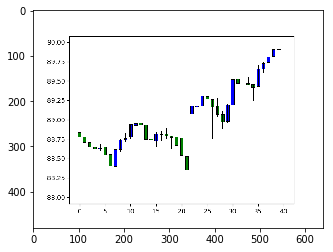

In [13]:
d = join(DESTINATION, "test_msft")
f = listdir(d)[100]
fd = join(d,f)
fd
img2 = cv2.imread(fd)
plt.imshow(img2)

In [14]:
FileLink(fd)

/home/liam/crypto-project/fast-crypto-ai/data/btc/stockgraphs/test_msft/UPbfa4cc65-ea1d-4d60-9edc-ff319e5b2312.png

### Generate Plots

Because matplotlib uses screen DPI I get different file dimentions when running notebooks and python scripts. I generated the plots using a script so that they have a height of 480 like all the other images I made previously. I skip this section because it is handled by the get_test_stocks.py file.

In [16]:
# data_folder = DESTINATION

stock_names = ['msft', 'fb', 'goog', 'aapl']

# for s in log_progress(stock_names):
#     print('Working on '+s, end='     \r')
#     data_file = f'{PATH}stock_data_{s}.csv'
#     generate_images(data_file=data_file, data_folder=DESTINATION, stock_name=s)

        

## Crop Plots

In [ ]:
stock_names = ['msft', 'fb', 'goog', 'aapl']

for s in log_progress(stock_names):
    print('Working on '+s, end='    \r')
    source_dir = join(DESTINATION, "test_"+s)
    dest_dir = join(DEST_CROPPED, "test_"+s)
    mkdir_p(dest_dir)
    crop_all_images(source_dir, dest_dir)

Doing a double check now that I realized I was classifying two periods in advance...

In [23]:
stock_names = ['msft2', 'fb2', 'goog2', 'aapl2']

for s in log_progress(stock_names):
    print('Working on '+s, end='    \r')
    source_dir = join(DESTINATION, "test_"+s)
    dest_dir = join(DEST_CROPPED, "test_"+s)
    mkdir_p(dest_dir)
    crop_all_images(source_dir, dest_dir)

VBox(children=(HTML(value=''), IntProgress(value=0, max=4)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=3908)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=3908)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=3908)))

VBox(children=(HTML(value=''), IntProgress(value=0, max=3908)))

## Check Results

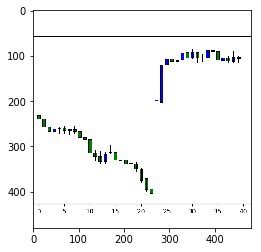

In [24]:
d = join(DEST_CROPPED, "test_msft2")
f = listdir(d)[2]
fd = join(d, f)
img = cv2.imread(fd)
plt.imshow(img)
